<a href="https://colab.research.google.com/github/Krisseil/laba_program_engineering/blob/main/Laba_Program_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pillow
!pip install requests
!pip install Pillow
!pip install staticmap
!pip install geopy
!pip install geopy

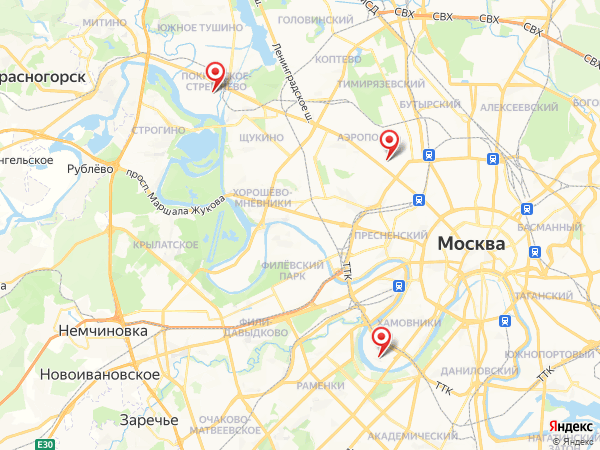

In [ ]:
# API - task 1

import requests
from PIL import Image
from io import BytesIO

stadiums_location = {
    "Лужники": "37.554191,55.715551",
    "Спартак": "37.440262,55.818015",
    "Динамо": "37.559809,55.791540"
}

base_url = "https://static-maps.yandex.ru/1.x/"
params = {
    "l": "map",  # Тип карты: схема (можно также использовать "sat" для спутниковой карты или "sat,skl" для гибридной)
    "pt": "~".join([f"{coord},pm2rdm" for coord in stadiums_location.values()])  # Координаты меток
}

# Запрос к API
response = requests.get(base_url, params=params)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    display(image)
else:
    print("Не удалось получить карту. Код ошибки:", response.status_code)


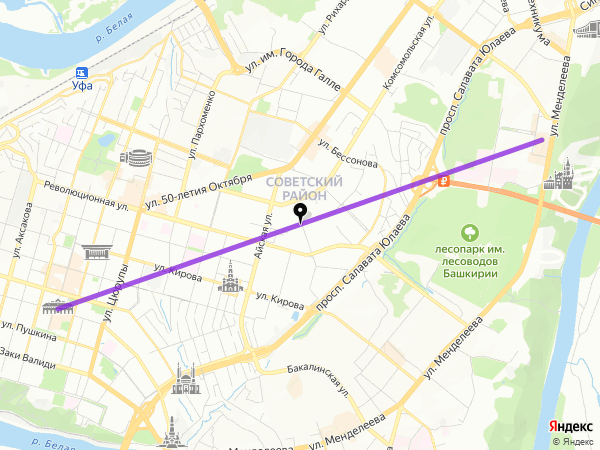

In [ ]:
# API - task 2
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
from geopy.distance import geodesic

points = [
    (55.943966, 54.724936),  # Гостинный двор
    (56.027079, 54.741724)   # ТЦ Башкирия
]

path_points = ",".join([f'{point[0]},{point[1]}' for point in points])

# Расчет средней точки маршрута
mid_lat = (points[0][0] + points[1][0]) / 2
mid_lon = (points[0][1] + points[1][1]) / 2

base_url = 'https://static-maps.yandex.ru/1.x'
params = {
    'pl': path_points,
    'pt': f'{mid_lat},{mid_lon},vkbkm',
    'l': 'map',
    'apikey': '858253bc-8d1b-407f-9bf5-cf9a041a7428'
}


try:
    response = requests.get(url=base_url, params=params)
except ConnectionError:
    print(ConnectionError, "Проверьте подключение к сети.")
else:
    image = Image.open(BytesIO(response.content))
    display(image)


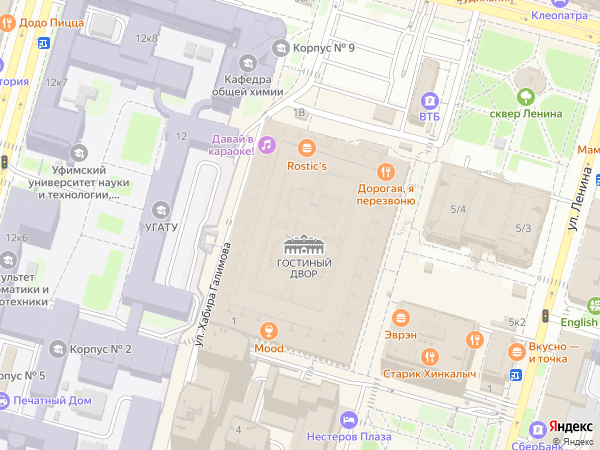

In [ ]:
# API - task 3
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
from geopy.distance import geodesic
from requests.exceptions import ConnectionError, HTTPError

points = [
    (55.943966, 54.724936)
]

base_url = 'https://static-maps.yandex.ru/1.x/'
params = {
    'll': f'{points[0][0]},{points[0][1]}',
    'l': 'map',
    'z': '17',
    'apikey': '858253bc-8d1b-407f-9bf5-cf9a041a7428'
}

try:
    response = requests.get(url=base_url, params=params)
except ConnectionError:
    print(ConnectionError, "Проверьте подключение к сети.")
else:
    image = Image.open(BytesIO(response.content))
    display(image)


In [ ]:
# API - task 4
from geopy.geocoders import Nominatim

def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent="city_coordinates_finder")
    location = geolocator.geocode(city_name)
    if location:
        return (location.latitude, location.longitude)
    else:
        return None

# Список для хранения координат городов
cities_coordinates = []

while True:
    city_name = input("Введите название города (или нажмите Enter для выхода): ")
    if city_name == "":
        break

    coordinates = get_city_coordinates(city_name)
    if coordinates:
        cities_coordinates.append((city_name, coordinates))
        print(f"Координаты города {city_name}: Широта {coordinates[0]}, Долгота {coordinates[1]}")
    else:
        print(f"Не удалось найти координаты для города {city_name}")

# Определяем самый южный город
if cities_coordinates:
    southernmost_city = min(cities_coordinates, key=lambda x: x[1][0])
    print(f"Самый южный город: {southernmost_city[0]} с координатами: Широта {southernmost_city[1][0]}, Долгота {southernmost_city[1][1]}")
else:
    print("Не было введено ни одного города с действительными координатами")


Введите название города (или нажмите Enter для выхода): уфа
Координаты города уфа: Широта 54.7261409, Долгота 55.947499
Введите название города (или нажмите Enter для выхода): москва
Координаты города москва: Широта 55.625578, Долгота 37.6063916
Введите название города (или нажмите Enter для выхода): 
Самый южный город: уфа с координатами: Широта 54.7261409, Долгота 55.947499


In [ ]:
# API - task 5
import requests

# Ваш ключ API Геосаджеста от Яндекса
api_key = 'fbab83b0-5f3f-4b71-85f3-1d06bc9a939d'

# URL-адрес для запроса к API Геосаджеста
url = 'https://geocode-maps.yandex.ru/1.x/'

# Адрес для геокодирования
address = "Россия, Уфа, Интернациональная, 181/3"

# Параметры запроса
params = {
    'apikey': api_key,
    'format': 'json',
    'geocode': address
}

# Отправка запроса к API
response = requests.get(url, params=params)

# Проверка статуса ответа
if response.status_code == 200:
    # Получение данных о местоположении из ответа
    data = response.json()
    found = int(data['response']['GeoObjectCollection']['metaDataProperty']['GeocoderResponseMetaData']['found'])
    if found > 0:
        coordinates_str = data['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
        latitude, longitude = map(float, coordinates_str.split())
        print(f"Адрес: {address}")
        print(f"Координаты: (Широта: {latitude}, Долгота: {longitude})")

        api_key2 = 'a59fc048-1c9f-4f96-9fe4-4a39f18459c0'
        url2 = 'https://search-maps.yandex.ru/v1/'
        # Параметры запроса
        params = {
          'apikey': api_key2,
          'text': 'аптека',
          'lang': 'ru_RU',
          'll': f'{latitude},{longitude}',
        }

        # Отправка запроса к API
        response = requests.get(url2, params=params)

        # Проверка статуса ответа
        if response.status_code == 200:
          # Получение данных о найденных организациях из ответа
          data = response.json()
          organizations = data['features']
          if organizations:
            nearest_pharmacy = organizations[0]
            pharmacy_name = nearest_pharmacy['properties']['name']
            pharmacy_address = nearest_pharmacy['properties']['description']
            print(f"Ближайшая аптека:")
            print(f"Название: {pharmacy_name}")
            print(f"Адрес: {pharmacy_address}")
        else:
          print("Аптеки не найдены")


Адрес: Россия, Уфа, Интернациональная, 181/3
Координаты: (Широта: 56.131293, Долгота: 54.802428)
Ближайшая аптека:
Название: Фармленд
Адрес: Первомайская ул., 98, Уфа, Россия


In [ ]:
# UnitTest - 1

def is_palindrome(data):
    return data == data[::-1]

def test_is_palindrome():
    test_cases = [
        ("deed", True),
        ("nun", True),
        ("level", True),
        ("ab", False),
        ("aba", True),
        ("deified", False),
        ("sagas", True),
        ("RaceCar", False),
        ("A man a plan a canal Panama", False),
        ("12321", True),
        ("12345", False),
        ("", True),
        (" ", True),
        ("a", True),
        ("Aa", False)
    ]

    all_tests_passed = True

    for data, expected in test_cases:
        result = is_palindrome(data)
        if result != expected:
            all_tests_passed = False
            break

    if all_tests_passed:
        print("YES")
    else:
        print("NO")

test_is_palindrome()

Тесты завершились с ошибками!


In [ ]:
# UnitTest - 2

import sys
def is_palindrome(data):
    return data == data[::-1]


#data = sys.stdin.read().strip()
data = input("Введите строку: ").strip()

if is_palindrome(data):
  print("YES")
  print("data = " + "'" + data + "'")
else:
  print("NO")
  print(data)
  print("data = " + "'" + data + "'")

Введите строку: a
YES
data = 'a'


In [ ]:
# UnitTest - 3

import re

def is_correct_mobile_phone_number_ru(number):
    pattern = r"^(8|\+7)\s?\(?\d{3}\)?\s?\d{3}[\s-]?\d{2}[\s-]?\d{2}$"
    return bool(re.match(pattern, number))

def test_is_correct_mobile_phone_number_ru():
    test_cases = [
        # Правильные номера
        ("+7 999 123-45-67", True),
        ("8(900)1234567", True),
        ("+7(900)1234567", True),
        ("+7 900 123 45 67", True),
        ("8 900 1234567", True),
        ("8 900 123-45-67", True),
        ("+7 900 1234567", True),
        ("+7 800 123-45-67", True),
        ("8 800 555 35 35", True),

        ("900 1234567", False),
        ("7 900 123 45 67", False),
        ("+8 900 123 45 67", False),
        ("+7 900 123", False),
        ("+7 900 123 45 6789", False),
        ("+7 (900) 123 45-67", True),
        ("+7-900-123-45-67", False),
        ("+7 (900) 12 34 567", False),
        ("+7 (900) 1234 5678", False),
        ("+7 900@123-45-67", False),
        ("8 900 12X-45-67", False),
        ("8 900 123--4567", False),
        ("+7 900 1234/567", False),
        ("7 900 12345678", False),
        ("+7 900 1234", False),
        ("+7(900)123-45-67-89", False),
        ("", False)
    ]

    all_tests_passed = True

    for number, expected in test_cases:
        result = is_correct_mobile_phone_number_ru(number)
        if result != expected:
#            print(f"Тест не пройден '{number}': ожидается {expected}, получено {result}")
            all_tests_passed = False

    if all_tests_passed:
        print("YES")

try:
    test_is_correct_mobile_phone_number_ru()
except AssertionError:
    print("NO")

YES


In [ ]:
# UnitTest - 4

import re

def is_correct_mobile_phone_number_ru(number):
    pattern = r"^(8|\+7)\s?\(?\d{3}\)?\s?\d{3}[\s-]?\d{2}[\s-]?\d{2}$"
    return bool(re.match(pattern, number))


#nomer = sys.stdin.read().strip()
nomer = input("Введите номер телефона: ").strip()
if is_correct_mobile_phone_number_ru(nomer):
  print("YES")
else:
  print("NO")

Введите номер телефона: 8 800 555 35 35
YES


In [ ]:
# UnitTest - 5

import re

def strip_punctuation_ru(data):
    data = re.sub(r'[\W_]+', ' ', data)
    return data.strip()

def test_strip_punctuation_ru():
    assert strip_punctuation_ru("Привет, мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет.... мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет: мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет; мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет? мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет! мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет, мир.") == "Привет мир"
    assert strip_punctuation_ru("Привет - мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет (мир)") == "Привет мир"
    assert strip_punctuation_ru("Привет [мир]") == "Привет мир"
    assert strip_punctuation_ru("Привет {мир}") == "Привет мир"
    assert strip_punctuation_ru("Привет <мир>") == "Привет мир"
    assert strip_punctuation_ru("Привет @ мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет # мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет $ мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет % мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет ^ мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет & мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет * мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет + мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет = мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет | мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет \\ мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет / мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет ~ мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет ` мир!") == "Привет мир"
    assert strip_punctuation_ru("Привет «мир»") == "Привет мир"
    assert strip_punctuation_ru("Привет „мир“") == "Привет мир"
    assert strip_punctuation_ru("Привет 123") == "Привет 123"
    assert strip_punctuation_ru("Привет_мир!") == "Привет мир"  # Подчёркивания тоже убираем
    assert strip_punctuation_ru("Привет") == "Привет"
    assert strip_punctuation_ru("") == ""
    print("YES")

try:
    test_strip_punctuation_ru()
except AssertionError:
    print("NO")

YES


In [ ]:
# UnitTest - 6

import re
import sys

def strip_punctuation_ru(data):
    data = re.sub(r'[\W_]+', ' ', data)
    return data.strip()


data = input("Введите строку из которой необходимо убрать знаки препинания: ").strip()
print(strip_punctuation_ru(data))

Введите строку из которой необходимо убрать знаки препинания: 6
6
